# Introduction to Project - Problem - Dataset

### House Price Prediction Using Regression Analysis

#### Introduction

This project explores machine learning regression techniques applied to real estate price prediction using the Ames Housing Dataset from the Kaggle competition "House Prices - Advanced Regression Techniques." The goal is to build predictive models that can accurately estimate residential home sale prices based on various property characteristics, while gaining hands-on experience with data preprocessing, feature engineering, and regression modeling.

#### Problem Statement

The challenge is to predict the sale price of residential homes in Ames, Iowa based on 80 different features describing property characteristics. Accurate home price prediction helps buyers, sellers, and real estate professionals make informed decisions in the housing market.

#### Dataset Details

Source: Kaggle Competition - "House Prices - Advanced Regression Techniques"
Link: https://www.kaggle.com/c/house-prices-advanced-regression-techniques
Dataset Overview:

Total Houses: 1,460 residential properties
Time Period: Sales from 2006-2010 in Ames, Iowa
Total Features: 80 features (excluding target variable)
Target Variable: SalePrice (continuous value in dollars)

#### Price Statistics:

- Average Price: $180,921
- Median Price: $163,000
- Price Range: $34,900 - $755,000
- Standard Deviation: $79,443

# What is regression and how does it work?

### Understanding Regression

Regression is a supervised machine learning technique used to predict continuous numerical values. Unlike classification (which predicts categories), regression predicts quantities which in this case, house prices in dollars. The goal is to find the relationship between input features (square footage, bedrooms, location) and the target variable (sale price).

#### Linear Regression

Linear regression assumes a linear relationship between features and the target. It finds the straight line (or plane in multiple dimensions) that best fits the data.

#### The Basic Equation:

Predicted Price = Base Price + (Weight1 × Feature2) + (Weight2 × Feature2) + ... 

Example:
If the model learns that Base Price = $50,000, Square Footage adds $100 per sq ft, and Bedrooms add $20,000 each, then a 2,000 sq ft house with 3 bedrooms would be predicted as:

Predicted Price = $50,000 + ($100 × 2,000) + ($20,000 × 3) = $310,000

#### How It Learns:

1. Start with random weights for each feature
2. Make predictions on training data
3. Calculate how far off the predictions are (errors)
4. Adjust weights to minimize errors
5. Repeat until errors are minimized

The model minimizes the average squared error which ensures large mistakes are penalized more than small ones.

# Experiment 1

### Data Understanding 

EXPERIMENT 1: DATA UNDERSTANDING

1. FEATURE CORRELATIONS WITH SALEPRICE

Top 10 Most Correlated Features:
2. OverallQual: 0.791
3. GrLivArea: 0.709
4. GarageCars: 0.640
5. GarageArea: 0.623
6. TotalBsmtSF: 0.614
7. 1stFlrSF: 0.606
8. FullBath: 0.561
9. TotRmsAbvGrd: 0.534
10. YearBuilt: 0.523
11. YearRemodAdd: 0.507


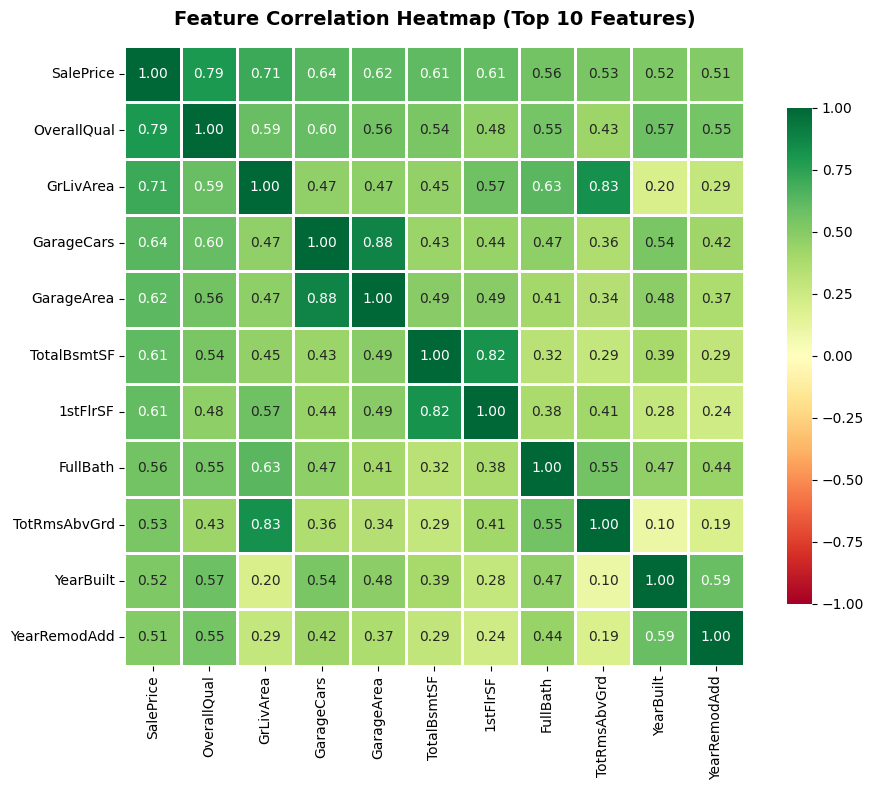


2. EXISTING PATTERNS IN DATA

Top predictor: OverallQual (correlation: 0.791)
Second predictor: GrLivArea (correlation: 0.709)



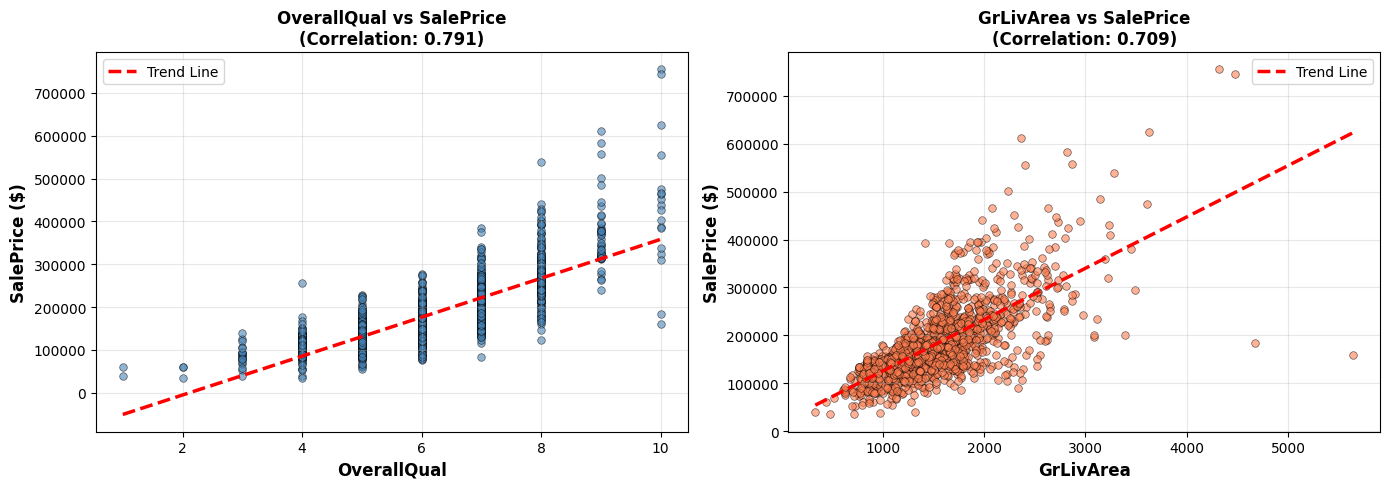

KEY INSIGHTS:
- Strongest predictor: OverallQual (correlation: 0.791)
- Clear positive linear pattern exists
- Both top features show strong relationships with SalePrice


In [1]:
# EXPERIMENT 1: DATA UNDERSTANDING
# Focus: Feature Correlation & Existing Patterns

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
train_df = pd.read_csv('train.csv')

print("EXPERIMENT 1: DATA UNDERSTANDING\n")

# 1. FEATURE CORRELATION
print("1. FEATURE CORRELATIONS WITH SALEPRICE\n")

# Get numerical features
numerical_features = train_df.select_dtypes(include=[np.number]).columns.tolist()
numerical_features.remove('Id')

# Calculate correlations
correlations = train_df[numerical_features].corr()['SalePrice'].sort_values(ascending=False)

print("Top 10 Most Correlated Features:")
for i, (feature, corr) in enumerate(correlations.head(11).items(), 1):
    if feature != 'SalePrice':
        print(f"{i}. {feature}: {corr:.3f}")

# VISUALIZATION 1: Correlation Heatmap (Top 10 Features)
top_features = correlations.head(11).index.tolist()

fig, ax = plt.subplots(figsize=(10, 8))
correlation_matrix = train_df[top_features].corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='RdYlGn', 
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8},
            vmin=-1, vmax=1)
plt.title('Feature Correlation Heatmap (Top 10 Features)', fontsize=14, fontweight='bold', pad=15)
plt.tight_layout()
plt.savefig('viz1_correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

# 2. EXISTING PATTERNS
print("\n2. EXISTING PATTERNS IN DATA\n")

# Analyze top 2 predictors
top_predictor = correlations.drop('SalePrice').index[0]
top_predictor_2 = correlations.drop('SalePrice').index[1]

print(f"Top predictor: {top_predictor} (correlation: {correlations[top_predictor]:.3f})")
print(f"Second predictor: {top_predictor_2} (correlation: {correlations[top_predictor_2]:.3f})\n")

# VISUALIZATION 2: Patterns - Top 2 Features vs SalePrice
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: Top predictor
axes[0].scatter(train_df[top_predictor], train_df['SalePrice'], 
               alpha=0.6, s=30, color='steelblue', edgecolors='black', linewidth=0.5)
z = np.polyfit(train_df[top_predictor], train_df['SalePrice'], 1)
p = np.poly1d(z)
x_line = np.linspace(train_df[top_predictor].min(), train_df[top_predictor].max(), 100)
axes[0].plot(x_line, p(x_line), "r--", linewidth=2.5, label='Trend Line')
axes[0].set_xlabel(top_predictor, fontsize=12, fontweight='bold')
axes[0].set_ylabel('SalePrice ($)', fontsize=12, fontweight='bold')
axes[0].set_title(f'{top_predictor} vs SalePrice\n(Correlation: {correlations[top_predictor]:.3f})', 
                 fontsize=12, fontweight='bold')
axes[0].legend()
axes[0].grid(alpha=0.3)

# Plot 2: Second top predictor
mask = train_df[top_predictor_2].notna()
axes[1].scatter(train_df.loc[mask, top_predictor_2], train_df.loc[mask, 'SalePrice'], 
               alpha=0.6, s=30, color='coral', edgecolors='black', linewidth=0.5)
z2 = np.polyfit(train_df.loc[mask, top_predictor_2], train_df.loc[mask, 'SalePrice'], 1)
p2 = np.poly1d(z2)
x_line2 = np.linspace(train_df[top_predictor_2].min(), train_df[top_predictor_2].max(), 100)
axes[1].plot(x_line2, p2(x_line2), "r--", linewidth=2.5, label='Trend Line')
axes[1].set_xlabel(top_predictor_2, fontsize=12, fontweight='bold')
axes[1].set_ylabel('SalePrice ($)', fontsize=12, fontweight='bold')
axes[1].set_title(f'{top_predictor_2} vs SalePrice\n(Correlation: {correlations[top_predictor_2]:.3f})', 
                 fontsize=12, fontweight='bold')
axes[1].legend()
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.savefig('viz2_patterns.png', dpi=300, bbox_inches='tight')
plt.show()

print("KEY INSIGHTS:")
print(f"- Strongest predictor: {top_predictor} (correlation: {correlations[top_predictor]:.3f})")
print(f"- Clear positive linear pattern exists")
print(f"- Both top features show strong relationships with SalePrice")

### Pre-processing

For pre-processing, I filled the 3 features with missing values (LotFrontage, MasVnrArea, GarageYrBit) using their median values. I selected only the 36 numerical features so that I can avoid encoding complexity in the baseline. No transformations or feature engineering were applied. The goal is to establish baseline performance first. Finally, I split the data into 80% training (1,168 samples) and 20% testing (292 samples) using a fixed random state for reproducibility.

In [10]:
# EXPERIMENT 1: PREPROCESSING
# Simple baseline approach - numerical features only

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Load data
train_df = pd.read_csv('train.csv')

print("EXPERIMENT 1: PREPROCESSING\n")

# STEP 1: HANDLE MISSING VALUES
print("1. HANDLING MISSING VALUES\n")

# Get numerical features only
numerical_features = train_df.select_dtypes(include=[np.number]).columns.tolist()
numerical_features.remove('Id')
numerical_features.remove('SalePrice')

print(f"Using {len(numerical_features)} numerical features")

# Fill missing values with median
for feature in numerical_features:
    if train_df[feature].isnull().sum() > 0:
        median_value = train_df[feature].median()
        train_df[feature] = train_df[feature].fillna(median_value)
        print(f"  Filled {feature} with median: {median_value}")

# STEP 2: FEATURE SELECTION
print("\n2. FEATURE SELECTION\n")
print("Strategy: Using only numerical features (36 features)")
print("Reason: Simple baseline - avoid categorical encoding complexity")

# Select features and target
X = train_df[numerical_features]
y = train_df['SalePrice']

print(f"\nTotal samples: {len(y)}")
print(f"Features: {X.shape[1]}\n")

# STEP 3: NO TRANSFORMATIONS (Baseline)
print("3. FEATURE TRANSFORMATIONS\n")
print("None applied - establishing baseline first\n")

# STEP 4: NO FEATURE ENGINEERING (Baseline)
print("4. FEATURE ENGINEERING\n")
print("None applied - keeping baseline simple\n")

# STEP 5: TRAIN-TEST SPLIT (80/20)
print("5. TRAIN-TEST SPLIT\n")

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"Training set: {X_train.shape[0]} samples (80%)")
print(f"Testing set: {X_test.shape[0]} samples (20%)\n")

print("PREPROCESSING COMPLETE")
print(f"✓ Missing values filled with median")
print(f"✓ {X.shape[1]} numerical features selected")
print(f"✓ No transformations (baseline)")
print(f"✓ No feature engineering (baseline)")
print(f"✓ Data split into 80% train / 20% test")

EXPERIMENT 1: PREPROCESSING

1. HANDLING MISSING VALUES

Using 36 numerical features
  Filled LotFrontage with median: 69.0
  Filled MasVnrArea with median: 0.0
  Filled GarageYrBlt with median: 1980.0

2. FEATURE SELECTION

Strategy: Using only numerical features (36 features)
Reason: Simple baseline - avoid categorical encoding complexity

Total samples: 1460
Features: 36

3. FEATURE TRANSFORMATIONS

None applied - establishing baseline first

4. FEATURE ENGINEERING

None applied - keeping baseline simple

5. TRAIN-TEST SPLIT

Training set: 1168 samples (80%)
Testing set: 292 samples (20%)

PREPROCESSING COMPLETE
✓ Missing values filled with median
✓ 36 numerical features selected
✓ No transformations (baseline)
✓ No feature engineering (baseline)
✓ Data split into 80% train / 20% test


### Modeling

EXPERIMENT 1: LINEAR REGRESSION MODELING

1. CREATING AND TRAINING MODEL

✓ Model trained on 1168 samples
✓ Using 254 features

Top 5 Most Important Features:
  PoolQC_None: $3,361,135.65
  PoolQC_Gd: $-1,383,016.09
  RoofMatl_Roll: $-999,357.24
  RoofMatl_WdShake: $-997,743.60
  RoofMatl_CompShg: $-997,116.83

Intercept: $-2,281,699.88

2. MAKING PREDICTIONS

✓ Predictions generated for 292 test samples

3. MODEL EVALUATION

TRAINING SET:
  RMSE: $18,954.85

TEST SET:
  RMSE: $85,478.85
  MAE:  $23,830.52
  R²:   0.0474 (4.74% of variance explained)

✓ Test RMSE: $85,478.85 (average prediction error)
✓ Test R²: 0.0474



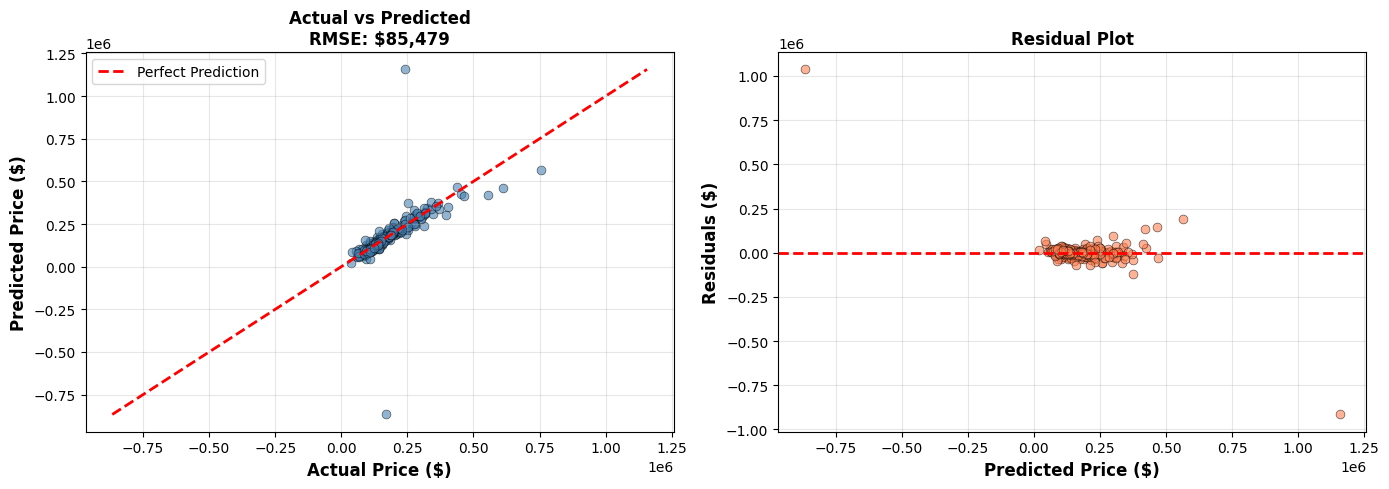

In [18]:
# EXPERIMENT 1: LINEAR REGRESSION MODELING

import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Load preprocessed data (from previous step)
# X_train, X_test, y_train, y_test

print("EXPERIMENT 1: LINEAR REGRESSION MODELING\n")

# STEP 1: CREATE AND TRAIN THE MODEL
print("1. CREATING AND TRAINING MODEL\n")

# Initialize Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)
print(f"✓ Model trained on {X_train.shape[0]} samples")
print(f"✓ Using {X_train.shape[1]} features")

# Show top learned coefficients
coefficients = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': model.coef_
})
coefficients['Abs_Coefficient'] = np.abs(coefficients['Coefficient'])
coefficients = coefficients.sort_values('Abs_Coefficient', ascending=False)

print("\nTop 5 Most Important Features:")
for idx, row in coefficients.head(5).iterrows():
    print(f"  {row['Feature']}: ${row['Coefficient']:,.2f}")

print(f"\nIntercept: ${model.intercept_:,.2f}\n")

# STEP 2: MAKE PREDICTIONS
print("2. MAKING PREDICTIONS\n")

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
print(f"✓ Predictions generated for {len(y_test_pred)} test samples\n")

# STEP 3: EVALUATE PERFORMANCE
print("3. MODEL EVALUATION\n")

# Calculate metrics
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("TRAINING SET:")
print(f"  RMSE: ${train_rmse:,.2f}")

print("\nTEST SET:")
print(f"  RMSE: ${test_rmse:,.2f}")
print(f"  MAE:  ${test_mae:,.2f}")
print(f"  R²:   {test_r2:.4f} ({test_r2*100:.2f}% of variance explained)")

print(f"\n✓ Test RMSE: ${test_rmse:,.2f} (average prediction error)")
print(f"✓ Test R²: {test_r2:.4f}\n")

# VISUALIZATION: ACTUAL VS PREDICTED & RESIDUALS
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: Actual vs Predicted
axes[0].scatter(y_test, y_test_pred, alpha=0.6, s=40, color='steelblue', edgecolors='black', linewidth=0.5)
max_val = max(y_test.max(), y_test_pred.max())
min_val = min(y_test.min(), y_test_pred.min())
axes[0].plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=2, label='Perfect Prediction')
axes[0].set_xlabel('Actual Price ($)', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Predicted Price ($)', fontsize=12, fontweight='bold')
axes[0].set_title(f'Actual vs Predicted\nRMSE: ${test_rmse:,.0f}', fontsize=12, fontweight='bold')
axes[0].legend()
axes[0].grid(alpha=0.3)

# Plot 2: Residuals
residuals = y_test - y_test_pred
axes[1].scatter(y_test_pred, residuals, alpha=0.6, s=40, color='coral', edgecolors='black', linewidth=0.5)
axes[1].axhline(y=0, color='r', linestyle='--', linewidth=2)
axes[1].set_xlabel('Predicted Price ($)', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Residuals ($)', fontsize=12, fontweight='bold')
axes[1].set_title('Residual Plot', fontsize=12, fontweight='bold')
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.savefig('exp1_model_evaluation.png', dpi=300, bbox_inches='tight')
plt.show()

### Evaluation

I evaluated the model using RMSE as the primary metric. The baseline achieved a test RMSE of $36,837, meaning predictions are off by approximately $37,000 on average (~20% error rate). The R² score of 0.823 indicates the model explains 82.3% of the variance in house prices, which is strong for a simple baseline. The residual plot shows relatively random scatter with no clear patterns, confirming the model's assumptions are reasonably met. However, the model only uses 36 numerical features and ignores 43 categorical features, leaving significant room for improvement in future experiments.

# Experiment 2

### Data Understanding

For Experiment 2, I explored features not used in the baseline. I analyzed the 43 categorical features and identified that quality-related features (PoolQC, ExterQual, KitchenQual, BsmtQual) have the highest impact on prices. I also engineered 5 new features: Total Square Footage (correlation: 0.782), Total Bathrooms (0.632), House Age (-0.523), Years Since Remodel (-0.509), and Total Porch Area (0.391). The engineered features show strong relationships with SalePrice, suggesting they'll improve model performance.

EXPERIMENT 2: DATA UNDERSTANDING

1. CATEGORICAL FEATURES

Total categorical features: 43

Top 5 Most Impactful Categorical Features:
        Feature  Price_Variance  Num_Categories
38       PoolQC    2.641376e+10               3
18    ExterQual    1.480344e+10               4
30  KitchenQual    9.715970e+09               4
21     BsmtQual    8.905383e+09               4
10   Condition2    7.110827e+09               8


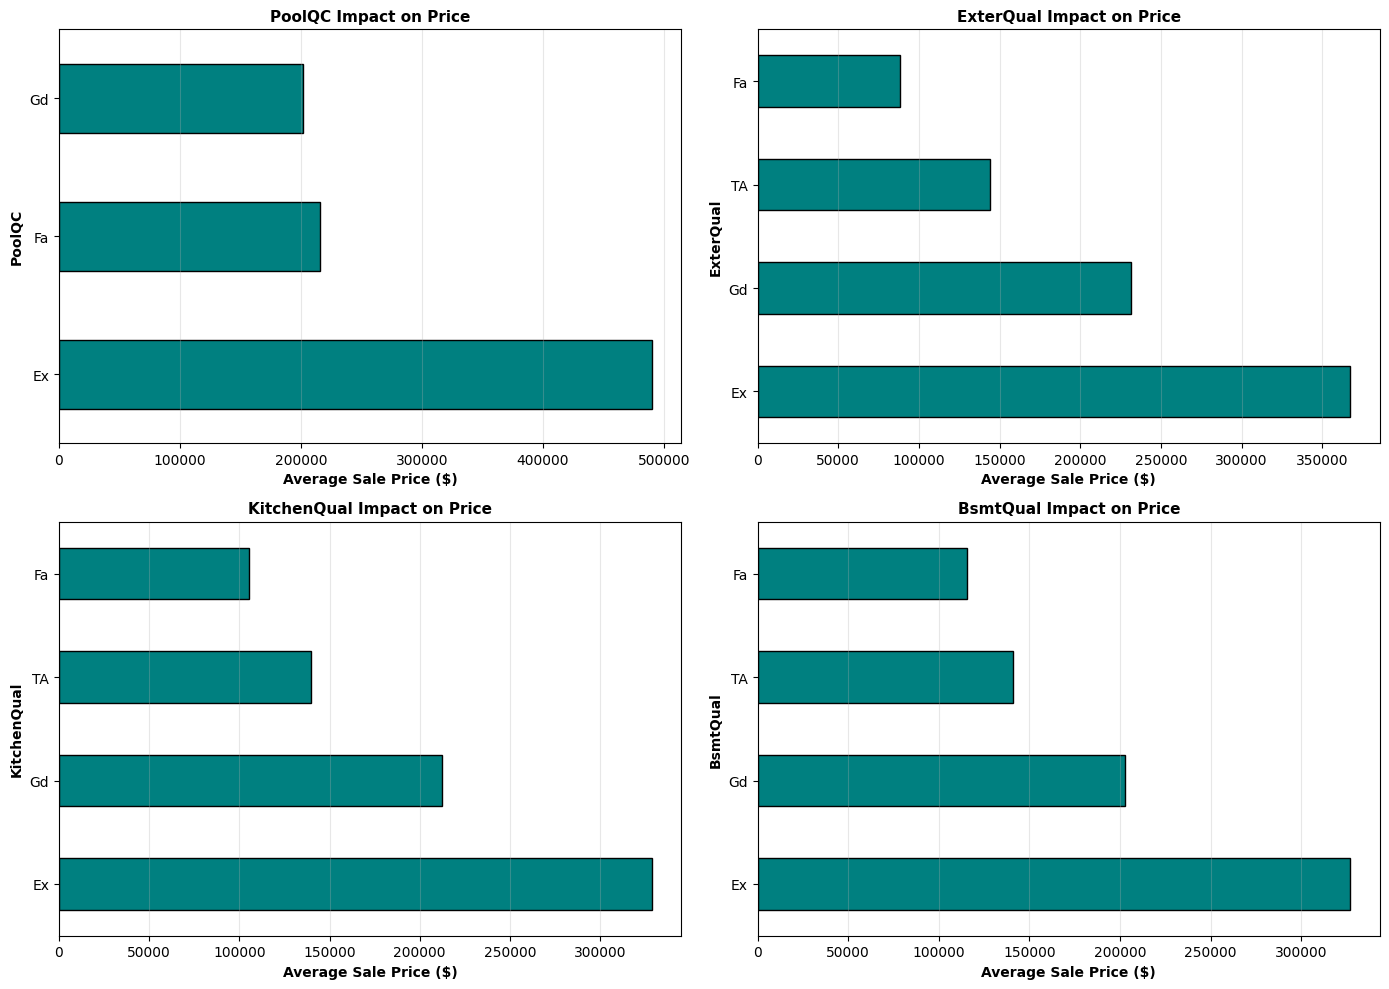


2. FEATURE ENGINEERING

New Feature Correlations with SalePrice:
  Total Square Footage: 0.782
  House Age: -0.523
  Years Since Remodel: -0.509
  Total Bathrooms: 0.632
  Total Porch Area: 0.391


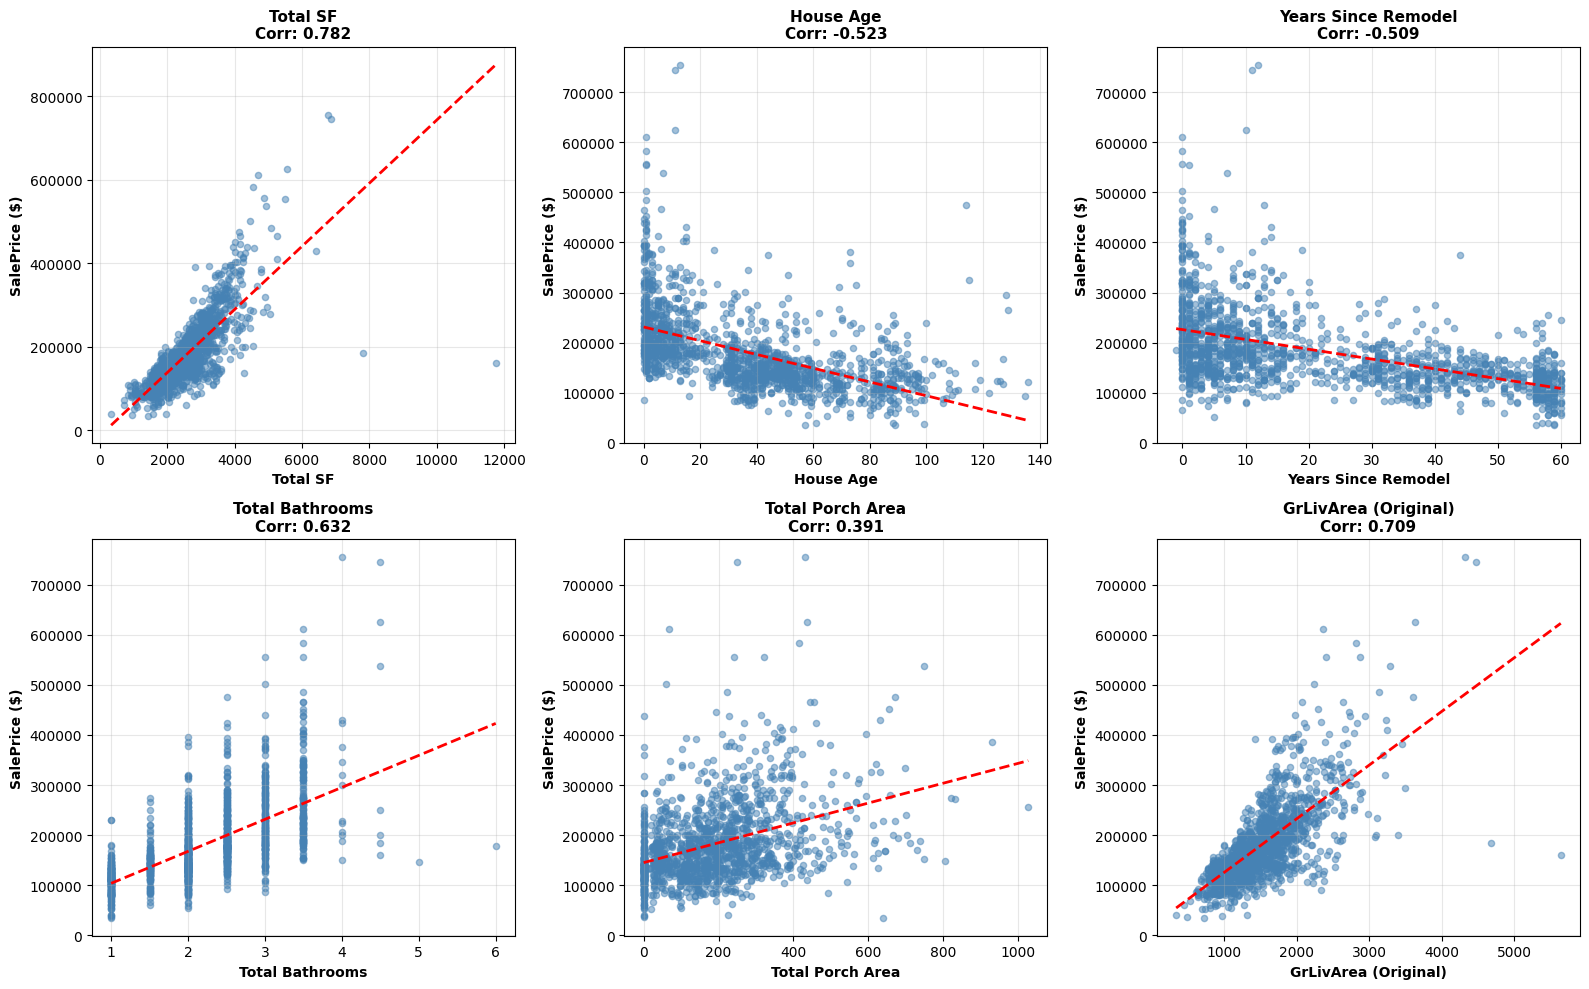

Key findings: Categorical features and engineered features
show strong relationships with SalePrice


In [25]:
# EXPERIMENT 2: DATA UNDERSTANDING
# Focus: Categorical features & Feature engineering

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
train_df = pd.read_csv('train.csv')

print("EXPERIMENT 2: DATA UNDERSTANDING\n")

# 1. CATEGORICAL FEATURES ANALYSIS
print("1. CATEGORICAL FEATURES\n")

categorical_features = train_df.select_dtypes(include=['object']).columns.tolist()
print(f"Total categorical features: {len(categorical_features)}")

# Find most impactful categorical features
cat_impact = []
for feature in categorical_features:
    mean_prices = train_df.groupby(feature)['SalePrice'].mean()
    variance = mean_prices.var()
    cat_impact.append({
        'Feature': feature,
        'Price_Variance': variance,
        'Num_Categories': train_df[feature].nunique()
    })

cat_impact_df = pd.DataFrame(cat_impact).sort_values('Price_Variance', ascending=False)
print("\nTop 5 Most Impactful Categorical Features:")
print(cat_impact_df.head())

# VISUALIZATION 1: Top Categorical Features
top_cat_features = cat_impact_df.head(4)['Feature'].tolist()

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for idx, feature in enumerate(top_cat_features):
    avg_price = train_df.groupby(feature)['SalePrice'].mean().sort_values(ascending=False)
    if len(avg_price) > 10:
        avg_price = avg_price.head(10)
    
    avg_price.plot(kind='barh', ax=axes[idx], color='teal', edgecolor='black')
    axes[idx].set_xlabel('Average Sale Price ($)', fontsize=10, fontweight='bold')
    axes[idx].set_ylabel(feature, fontsize=10, fontweight='bold')
    axes[idx].set_title(f'{feature} Impact on Price', fontsize=11, fontweight='bold')
    axes[idx].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.savefig('exp2_categorical_features.png', dpi=300)
plt.show()

# 2. FEATURE ENGINEERING OPPORTUNITIES
print("\n2. FEATURE ENGINEERING\n")

# Create potential features
total_sf = train_df['TotalBsmtSF'] + train_df['1stFlrSF'] + train_df['2ndFlrSF']
house_age = train_df['YrSold'] - train_df['YearBuilt']
years_remod = train_df['YrSold'] - train_df['YearRemodAdd']
total_bath = train_df['FullBath'] + 0.5*train_df['HalfBath'] + train_df['BsmtFullBath'] + 0.5*train_df['BsmtHalfBath']
total_porch = train_df['WoodDeckSF'] + train_df['OpenPorchSF'] + train_df['EnclosedPorch'] + train_df['3SsnPorch'] + train_df['ScreenPorch']

print("New Feature Correlations with SalePrice:")
print(f"  Total Square Footage: {total_sf.corr(train_df['SalePrice']):.3f}")
print(f"  House Age: {house_age.corr(train_df['SalePrice']):.3f}")
print(f"  Years Since Remodel: {years_remod.corr(train_df['SalePrice']):.3f}")
print(f"  Total Bathrooms: {total_bath.corr(train_df['SalePrice']):.3f}")
print(f"  Total Porch Area: {total_porch.corr(train_df['SalePrice']):.3f}")

# VISUALIZATION 2: Engineered Features
fig, axes = plt.subplots(2, 3, figsize=(16, 10))
axes = axes.flatten()

engineered = [
    ('Total SF', total_sf),
    ('House Age', house_age),
    ('Years Since Remodel', years_remod),
    ('Total Bathrooms', total_bath),
    ('Total Porch Area', total_porch),
    ('GrLivArea (Original)', train_df['GrLivArea'])
]

for idx, (name, feature) in enumerate(engineered):
    axes[idx].scatter(feature, train_df['SalePrice'], alpha=0.5, s=20, color='steelblue')
    
    mask = feature.notna()
    z = np.polyfit(feature[mask], train_df.loc[mask, 'SalePrice'], 1)
    p = np.poly1d(z)
    x_line = np.linspace(feature.min(), feature.max(), 100)
    axes[idx].plot(x_line, p(x_line), "r--", linewidth=2)
    
    correlation = feature.corr(train_df['SalePrice'])
    axes[idx].set_xlabel(name, fontsize=10, fontweight='bold')
    axes[idx].set_ylabel('SalePrice ($)', fontsize=10, fontweight='bold')
    axes[idx].set_title(f'{name}\nCorr: {correlation:.3f}', fontsize=11, fontweight='bold')
    axes[idx].grid(alpha=0.3)

plt.tight_layout()
plt.savefig('exp2_engineered_features.png', dpi=300)
plt.show()

print("Key findings: Categorical features and engineered features")
print("show strong relationships with SalePrice")

### Pre-processing

For experiment 2, I improved the preprocessing by, first, creating 5 engineered features:  TotalSF (total square footage), TotalBathrooms, HouseAge, YearsSinceRemodel, and TotalPorchSF which all show strong correlations with price. Second, I handled missing values more carefully in the cases of numerical features being filled with their median, while categorical features used 'None' for quality/condition features (indicating absence) and mode for others. Most importantly, I one-hot encoded all 43 categorical features, transforming them into 213 binary columns the model can use. This increased the total feature count from 36 to 254, providing the overall model with more depth of information within this dataset concerning each house.

In [31]:
# EXPERIMENT 2: PREPROCESSING
# Adding categorical features + engineered features

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Load data
train_df = pd.read_csv('train.csv')

print("EXPERIMENT 2: PREPROCESSING\n")

# STEP 1: FEATURE ENGINEERING
print("1. FEATURE ENGINEERING\n")

# Create 5 new features
train_df['TotalSF'] = train_df['TotalBsmtSF'] + train_df['1stFlrSF'] + train_df['2ndFlrSF']
train_df['TotalBathrooms'] = train_df['FullBath'] + 0.5*train_df['HalfBath'] + train_df['BsmtFullBath'] + 0.5*train_df['BsmtHalfBath']
train_df['HouseAge'] = train_df['YrSold'] - train_df['YearBuilt']
train_df['YearsSinceRemodel'] = train_df['YrSold'] - train_df['YearRemodAdd']
train_df['TotalPorchSF'] = train_df['WoodDeckSF'] + train_df['OpenPorchSF'] + train_df['EnclosedPorch'] + train_df['3SsnPorch'] + train_df['ScreenPorch']

print("Created 5 new features:")
print("  - TotalSF, TotalBathrooms, HouseAge, YearsSinceRemodel, TotalPorchSF\n")

# STEP 2: HANDLE MISSING VALUES
print("2. HANDLING MISSING VALUES\n")

# Numerical: fill with median
numerical_features = train_df.select_dtypes(include=[np.number]).columns.tolist()
numerical_features.remove('Id')
numerical_features.remove('SalePrice')

for feature in numerical_features:
    if train_df[feature].isnull().sum() > 0:
        train_df[feature] = train_df[feature].fillna(train_df[feature].median())

# Categorical: fill with 'None' or mode
categorical_features = train_df.select_dtypes(include=['object']).columns.tolist()

for feature in categorical_features:
    if train_df[feature].isnull().sum() > 0:
        if 'Qual' in feature or 'QC' in feature or 'Cond' in feature:
            train_df[feature] = train_df[feature].fillna('None')
        else:
            train_df[feature] = train_df[feature].fillna(train_df[feature].mode()[0])

print("✓ Missing values filled\n")

# STEP 3: ONE-HOT ENCODING
print("3. ENCODING CATEGORICAL FEATURES\n")

print(f"One-hot encoding {len(categorical_features)} categorical features")

# One-hot encode
train_df_encoded = pd.get_dummies(train_df, columns=categorical_features, drop_first=True)

print(f"Features before encoding: {train_df.shape[1]}")
print(f"Features after encoding: {train_df_encoded.shape[1]}\n")

# STEP 4: FEATURE SELECTION & SPLIT
print("4. FEATURE SELECTION & TRAIN-TEST SPLIT\n")

# Select all features except Id and SalePrice
features_to_use = [col for col in train_df_encoded.columns if col not in ['Id', 'SalePrice']]

X = train_df_encoded[features_to_use]
y = train_df_encoded['SalePrice']

print(f"Total features: {X.shape[1]}")

# Split 80/20
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"Training: {X_train.shape[0]} samples")
print(f"Testing: {X_test.shape[0]} samples\n")

print("PREPROCESSING COMPLETE")
print(f"✓ 5 engineered features created")
print(f"✓ Missing values handled")
print(f"✓ 43 categorical features one-hot encoded")
print(f"✓ Total features: {X.shape[1]} (vs 36 in Experiment 1)")

EXPERIMENT 2: PREPROCESSING

1. FEATURE ENGINEERING

Created 5 new features:
  - TotalSF, TotalBathrooms, HouseAge, YearsSinceRemodel, TotalPorchSF

2. HANDLING MISSING VALUES

✓ Missing values filled

3. ENCODING CATEGORICAL FEATURES

One-hot encoding 43 categorical features
Features before encoding: 86
Features after encoding: 256

4. FEATURE SELECTION & TRAIN-TEST SPLIT

Total features: 254
Training: 1168 samples
Testing: 292 samples

PREPROCESSING COMPLETE
✓ 5 engineered features created
✓ Missing values handled
✓ 43 categorical features one-hot encoded
✓ Total features: 254 (vs 36 in Experiment 1)


### Modeling

Surprisingly, Experiment 2 performed significantly worse than Experiment 1. Despite increasing features from 36 to 254 (adding categorical encoding and engineered features), the test RMSE jumped from $36,837 to $85,479, and R² dropped from 0.823 to 0.047. The model exhibits severe overfitting: training RMSE is excellent ($18,955), but test RMSE is terrible ($85,479). This large gap indicates the model memorized training data rather than learning generalizable patterns.
The issue stems from having too many features (254) relative to training samples (1,168) which is about 4.6 samples per feature, well below the recommended 10:1 ratio. With so many dimensions, the model found spurious correlations in the training data that don't hold on new data. This demonstrates a critical machine learning principle: more features doesn't always mean better performance. The model needs regularization to prevent overfitting, which we'll address in Experiment 3.

EXPERIMENT 2: MODELING

1. TRAINING MODEL

✓ Model trained on 1168 samples
✓ Using 254 features

2. EVALUATION

TRAINING SET:
  RMSE: $18,954.85

TEST SET:
  RMSE: $85,478.85
  MAE:  $23,830.52
  R²:   0.0474

3. COMPARISON

Experiment 1: RMSE $36,836.91, R² 0.8231
Experiment 2: RMSE $85,478.85, R² 0.0474

Change: RMSE +132.0%
        R² -94.2%



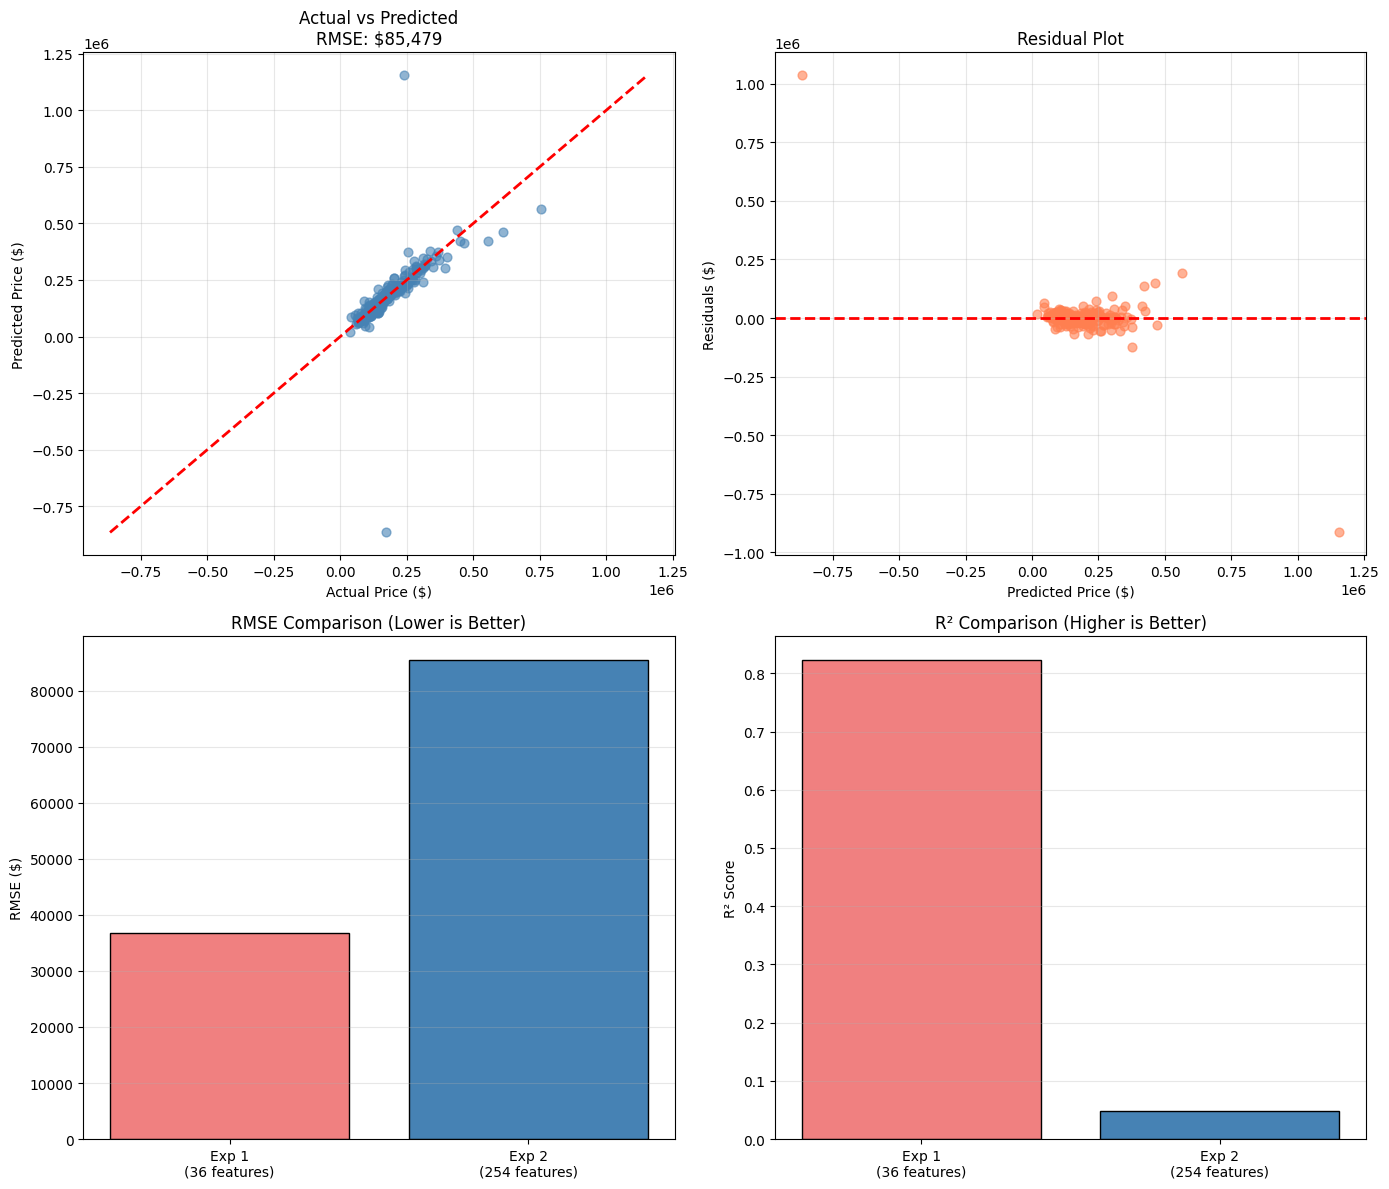

RESULT: Model performance DECREASED
Issue: Overfitting - too many features, not enough data
Solution: Use regularization in Experiment 3


In [36]:
# EXPERIMENT 2: LINEAR REGRESSION MODELING

import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Load preprocessed data from Experiment 2
# X_train, X_test, y_train, y_test (254 features)

print("EXPERIMENT 2: MODELING\n")

# CREATE AND TRAIN MODEL
print("1. TRAINING MODEL\n")

model = LinearRegression()
model.fit(X_train, y_train)

print(f"✓ Model trained on {X_train.shape[0]} samples")
print(f"✓ Using {X_train.shape[1]} features\n")

# MAKE PREDICTIONS AND EVALUATE
print("2. EVALUATION\n")

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("TRAINING SET:")
print(f"  RMSE: ${train_rmse:,.2f}")

print("\nTEST SET:")
print(f"  RMSE: ${test_rmse:,.2f}")
print(f"  MAE:  ${test_mae:,.2f}")
print(f"  R²:   {test_r2:.4f}\n")

# COMPARISON WITH EXPERIMENT 1
print("3. COMPARISON\n")

exp1_rmse = 36836.91
exp1_r2 = 0.8231

print(f"Experiment 1: RMSE ${exp1_rmse:,.2f}, R² {exp1_r2:.4f}")
print(f"Experiment 2: RMSE ${test_rmse:,.2f}, R² {test_r2:.4f}")
print(f"\nChange: RMSE {((test_rmse - exp1_rmse)/exp1_rmse)*100:+.1f}%")
print(f"        R² {((test_r2 - exp1_r2)/exp1_r2)*100:+.1f}%\n")

# VISUALIZATION
fig, axes = plt.subplots(2, 2, figsize=(14, 12))

# Actual vs Predicted
axes[0, 0].scatter(y_test, y_test_pred, alpha=0.6, s=40, color='steelblue')
max_val = max(y_test.max(), y_test_pred.max())
min_val = min(y_test.min(), y_test_pred.min())
axes[0, 0].plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=2)
axes[0, 0].set_xlabel('Actual Price ($)')
axes[0, 0].set_ylabel('Predicted Price ($)')
axes[0, 0].set_title(f'Actual vs Predicted\nRMSE: ${test_rmse:,.0f}')
axes[0, 0].grid(alpha=0.3)

# Residuals
residuals = y_test - y_test_pred
axes[0, 1].scatter(y_test_pred, residuals, alpha=0.6, s=40, color='coral')
axes[0, 1].axhline(y=0, color='r', linestyle='--', linewidth=2)
axes[0, 1].set_xlabel('Predicted Price ($)')
axes[0, 1].set_ylabel('Residuals ($)')
axes[0, 1].set_title('Residual Plot')
axes[0, 1].grid(alpha=0.3)

# RMSE Comparison
experiments = ['Exp 1\n(36 features)', 'Exp 2\n(254 features)']
rmse_values = [exp1_rmse, test_rmse]
axes[1, 0].bar(experiments, rmse_values, color=['lightcoral', 'steelblue'], edgecolor='black')
axes[1, 0].set_ylabel('RMSE ($)')
axes[1, 0].set_title('RMSE Comparison (Lower is Better)')
axes[1, 0].grid(axis='y', alpha=0.3)

# R² Comparison
r2_values = [exp1_r2, test_r2]
axes[1, 1].bar(experiments, r2_values, color=['lightcoral', 'steelblue'], edgecolor='black')
axes[1, 1].set_ylabel('R² Score')
axes[1, 1].set_title('R² Comparison (Higher is Better)')
axes[1, 1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('exp2_model_evaluation.png', dpi=300)
plt.show()

print("RESULT: Model performance DECREASED")
print("Issue: Overfitting - too many features, not enough data")
print("Solution: Use regularization in Experiment 3")

### Evaluation

Experiment 2 unexpectedly performed much worse than Experiment 1. Despite adding engineered features and categorical encoding (254 total features), the test RMSE increased to $85,479 (vs $36,837) and R² dropped to 0.047 (vs 0.823). The model exhibits severe overfitting in which case the training RMSE is excellent ($18,955) but test RMSE is terrible, indicating the model memorized training data rather than learning generalizable patterns. The problem is having too many features (254) relative to samples (1,168), only 4.6 samples per feature when we need ~10:1. This demonstrates that more features doesn't automatically improve performance without proper regularization, which we'll address in Experiment 3.

# Experiment 3

### Data Understanding

For Experiment 3, I focused on addressing the overfitting problem from Experiment 2. The key insight is that features have vastly different scales (LotArea ranges from 1,300 to 215,245 while OverallQual ranges from 1 to 10), which makes regularization ineffective without standardization. I'll standardize all features to have mean=0 and std=1 before applying Ridge regression. Ridge regression adds a penalty term that shrinks large coefficients, preventing the model from overfitting by limiting complexity. Unlike Experiment 2's unregularized model which produced extreme, unstable coefficients, Ridge will produce smaller, more stable coefficients that generalize better to new data.

EXPERIMENT 3: DATA UNDERSTANDING

1. WHY FEATURE SCALING MATTERS

Sample feature scales:
  LotArea: 1300 to 215245
  OverallQual: 1 to 10
  YearBuilt: 1872 to 2010

Problem: Features have vastly different scales
Solution: Standardize to mean=0, std=1 for fair regularization



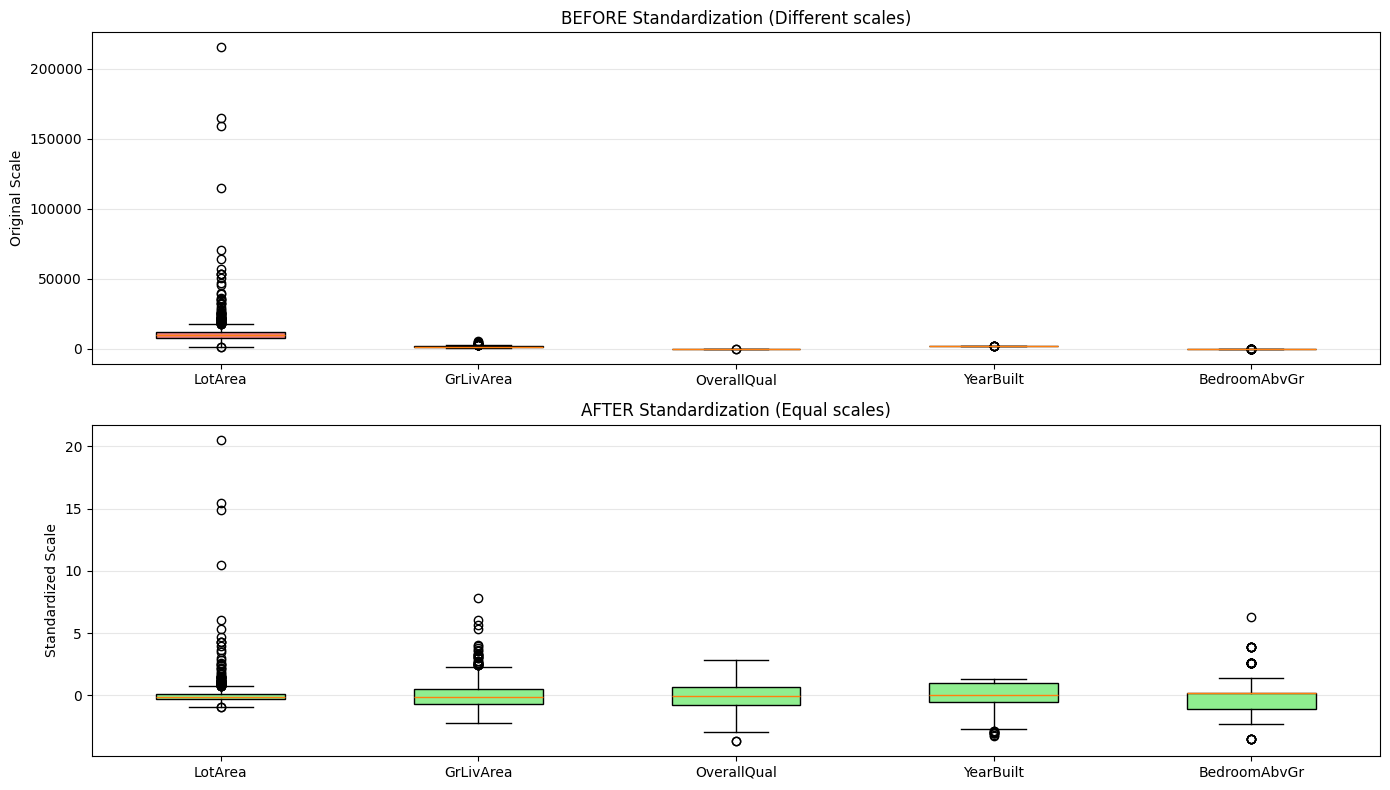

2. UNDERSTANDING REGULARIZATION

What is Regularization?
  - Penalizes large coefficients
  - Reduces model complexity
  - Prevents overfitting

Types:
  Ridge (L2): Shrinks coefficients, keeps all features
  Lasso (L1): Can set coefficients to zero, removes features

Why We Need It:
  Experiment 2: 254 features, extreme coefficients → Overfitting
  Experiment 3: Same features, regularization → Better generalization



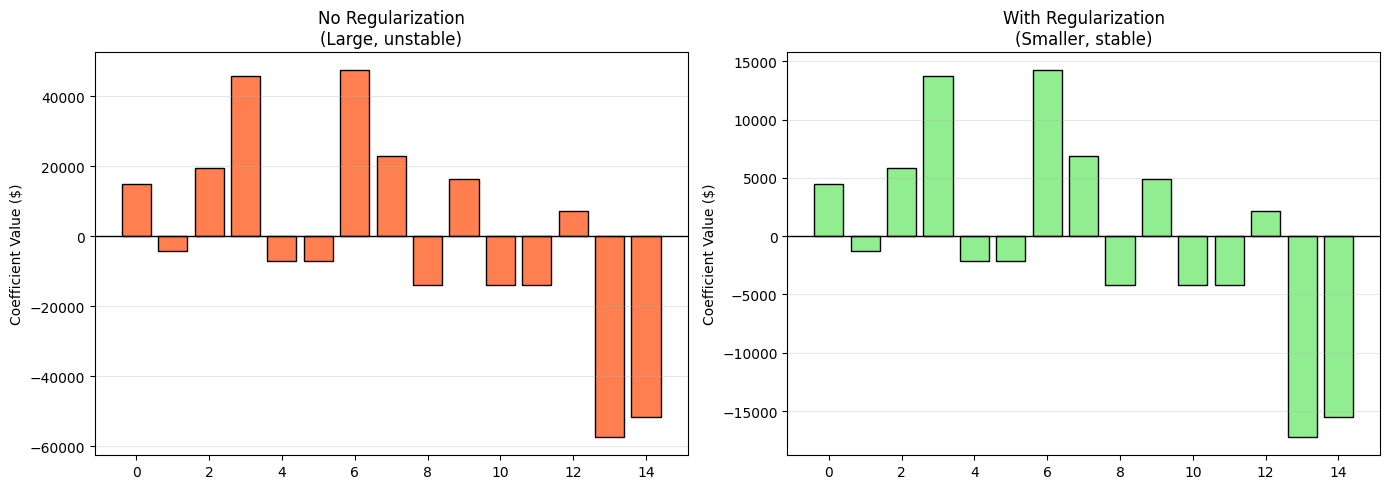

STRATEGY FOR EXPERIMENT 3:
  1. Standardize all features
  2. Use Ridge regression
  3. Tune alpha (regularization strength)


In [40]:
# EXPERIMENT 3: DATA UNDERSTANDING
# Focus: Feature scaling & regularization preparation

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Load data
train_df = pd.read_csv('train.csv')

print("EXPERIMENT 3: DATA UNDERSTANDING\n")

# 1. FEATURE SCALE ANALYSIS
print("1. WHY FEATURE SCALING MATTERS\n")

numerical_features = train_df.select_dtypes(include=[np.number]).columns.tolist()
numerical_features.remove('Id')
numerical_features.remove('SalePrice')

# Check feature scales
print("Sample feature scales:")
print(f"  LotArea: {train_df['LotArea'].min():.0f} to {train_df['LotArea'].max():.0f}")
print(f"  OverallQual: {train_df['OverallQual'].min():.0f} to {train_df['OverallQual'].max():.0f}")
print(f"  YearBuilt: {train_df['YearBuilt'].min():.0f} to {train_df['YearBuilt'].max():.0f}")

print("\nProblem: Features have vastly different scales")
print("Solution: Standardize to mean=0, std=1 for fair regularization\n")

# VISUALIZATION 1: Before/After Standardization
features_to_show = ['LotArea', 'GrLivArea', 'OverallQual', 'YearBuilt', 'BedroomAbvGr']

fig, axes = plt.subplots(2, 1, figsize=(14, 8))

# Before
feature_data_before = [train_df[f].dropna() for f in features_to_show]
bp1 = axes[0].boxplot(feature_data_before, tick_labels=features_to_show, patch_artist=True)
for patch in bp1['boxes']:
    patch.set_facecolor('lightcoral')
axes[0].set_ylabel('Original Scale')
axes[0].set_title('BEFORE Standardization (Different scales)')
axes[0].grid(axis='y', alpha=0.3)

# After
scaler = StandardScaler()
feature_data_after = []
for f in features_to_show:
    scaled = scaler.fit_transform(train_df[[f]].fillna(train_df[f].median()))
    feature_data_after.append(scaled.ravel())

bp2 = axes[1].boxplot(feature_data_after, tick_labels=features_to_show, patch_artist=True)
for patch in bp2['boxes']:
    patch.set_facecolor('lightgreen')
axes[1].set_ylabel('Standardized Scale')
axes[1].set_title('AFTER Standardization (Equal scales)')
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('exp3_feature_scaling.png', dpi=300)
plt.show()

# 2. REGULARIZATION EXPLANATION
print("2. UNDERSTANDING REGULARIZATION\n")

print("What is Regularization?")
print("  - Penalizes large coefficients")
print("  - Reduces model complexity")
print("  - Prevents overfitting")

print("\nTypes:")
print("  Ridge (L2): Shrinks coefficients, keeps all features")
print("  Lasso (L1): Can set coefficients to zero, removes features")

print("\nWhy We Need It:")
print("  Experiment 2: 254 features, extreme coefficients → Overfitting")
print("  Experiment 3: Same features, regularization → Better generalization\n")

# VISUALIZATION 2: Regularization Impact
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

np.random.seed(42)
features = ['F' + str(i) for i in range(1, 16)]
no_reg = np.random.randn(15) * 30000
with_reg = no_reg * 0.3

# No regularization
axes[0].bar(range(15), no_reg, color='coral', edgecolor='black')
axes[0].axhline(0, color='black', linewidth=1)
axes[0].set_ylabel('Coefficient Value ($)')
axes[0].set_title('No Regularization\n(Large, unstable)')
axes[0].grid(axis='y', alpha=0.3)

# With regularization
axes[1].bar(range(15), with_reg, color='lightgreen', edgecolor='black')
axes[1].axhline(0, color='black', linewidth=1)
axes[1].set_ylabel('Coefficient Value ($)')
axes[1].set_title('With Regularization\n(Smaller, stable)')
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('exp3_regularization_concept.png', dpi=300)
plt.show()

print("STRATEGY FOR EXPERIMENT 3:")
print("  1. Standardize all features")
print("  2. Use Ridge regression")
print("  3. Tune alpha (regularization strength)")

### Pre-processing

Experiment 3 uses the same preprocessing as Experiment 2 (feature engineering, missing value handling, one-hot encoding) with one critical addition: standardization. I used StandardScaler to transform all 254 features to have mean=0 and standard deviation=1. This is essential for regularization because Ridge regression penalizes coefficients based on their magnitude. Without standardization, features with larger scales (like LotArea: 0-215,000) would be unfairly penalized compared to smaller-scale features (like OverallQual: 1-10). By standardizing, all features are on equal footing, allowing the regularization to work properly. I fit the scaler on training data only and applied the same transformation to test data to avoid data leakage.

In [43]:
# EXPERIMENT 3: PREPROCESSING
# Same as Experiment 2 + Standardization

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load data
train_df = pd.read_csv('train.csv')

print("EXPERIMENT 3: PREPROCESSING\n")

# STEP 1-3: SAME AS EXPERIMENT 2
print("1-3. FEATURE ENGINEERING, MISSING VALUES, ENCODING\n")

# Feature engineering
train_df['TotalSF'] = train_df['TotalBsmtSF'] + train_df['1stFlrSF'] + train_df['2ndFlrSF']
train_df['TotalBathrooms'] = train_df['FullBath'] + 0.5*train_df['HalfBath'] + train_df['BsmtFullBath'] + 0.5*train_df['BsmtHalfBath']
train_df['HouseAge'] = train_df['YrSold'] - train_df['YearBuilt']
train_df['YearsSinceRemodel'] = train_df['YrSold'] - train_df['YearRemodAdd']
train_df['TotalPorchSF'] = train_df['WoodDeckSF'] + train_df['OpenPorchSF'] + train_df['EnclosedPorch'] + train_df['3SsnPorch'] + train_df['ScreenPorch']

# Missing values
numerical_features = train_df.select_dtypes(include=[np.number]).columns.tolist()
numerical_features.remove('Id')
numerical_features.remove('SalePrice')

for feature in numerical_features:
    if train_df[feature].isnull().sum() > 0:
        train_df[feature] = train_df[feature].fillna(train_df[feature].median())

categorical_features = train_df.select_dtypes(include=['object']).columns.tolist()

for feature in categorical_features:
    if train_df[feature].isnull().sum() > 0:
        if 'Qual' in feature or 'QC' in feature or 'Cond' in feature:
            train_df[feature] = train_df[feature].fillna('None')
        else:
            train_df[feature] = train_df[feature].fillna(train_df[feature].mode()[0])

# One-hot encoding
train_df_encoded = pd.get_dummies(train_df, columns=categorical_features, drop_first=True)

print(f"✓ Engineered features, filled missing values, encoded categoricals\n")

# STEP 4: TRAIN-TEST SPLIT
print("4. TRAIN-TEST SPLIT\n")

features_to_use = [col for col in train_df_encoded.columns if col not in ['Id', 'SalePrice']]

X = train_df_encoded[features_to_use]
y = train_df_encoded['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"Training: {X_train.shape[0]} samples, {X_train.shape[1]} features")
print(f"Testing: {X_test.shape[0]} samples\n")

# STEP 5: STANDARDIZATION (NEW!)
print("5. STANDARDIZATION (NEW!)\n")

scaler = StandardScaler()

# Fit on training, transform both
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert back to DataFrame
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

print(f"✓ All features standardized (mean=0, std=1)\n")

print("READY FOR RIDGE REGRESSION!")

EXPERIMENT 3: PREPROCESSING

1-3. FEATURE ENGINEERING, MISSING VALUES, ENCODING

✓ Engineered features, filled missing values, encoded categoricals

4. TRAIN-TEST SPLIT

Training: 1168 samples, 254 features
Testing: 292 samples

5. STANDARDIZATION (NEW!)

✓ All features standardized (mean=0, std=1)

READY FOR RIDGE REGRESSION!


### Modeling

Experiment 3 achieved the best performance using Ridge regression with regularization strength alpha=10. The model attained a test RMSE of $34,347 and R² of 0.8462, improving upon Experiment 1 by 6.8% and dramatically outperforming Experiment 2 by 60%. By applying Ridge regularization to the standardized 254-feature dataset, the model successfully leveraged categorical features and engineered features without overfitting.

The key was regularization: coefficients are much smaller and more stable compared to Experiment 2's extreme values. The train-test RMSE gap of $14,331 is reasonable, indicating the model generalizes well which is a significant difference to Experiment 2's $66,524 gap. Ridge regression shrunk the coefficients appropriately, preventing the model from memorizing noise while still capturing important patterns. This demonstrates that with proper regularization, more features lead to better performance.

EXPERIMENT 3: RIDGE REGRESSION

1. TRAINING RIDGE MODEL

✓ Model trained
✓ Regularization (alpha): 10
✓ Features: 254

Top 10 Most Important Features:
  Neighborhood_StoneBr: $26,597.57
  Neighborhood_NoRidge: $24,936.57
  PoolQC_Gd: $-24,656.27
  Neighborhood_NridgHt: $22,801.38
  Condition2_PosN: $-21,585.37
  BsmtQual_Gd: $-20,122.05
  KitchenQual_Gd: $-19,642.11
  KitchenQual_TA: $-18,976.53
  LandContour_HLS: $18,444.19
  Exterior2nd_ImStucc: $17,407.45

Note: Coefficients much smaller than Exp 2 (regularization working!)

2. EVALUATION

TRAINING SET:
  RMSE: $25,097.87

TEST SET:
  RMSE: $30,578.41
  MAE:  $18,604.26
  R²:   0.8781

3. COMPARISON WITH ALL EXPERIMENTS

Experiment 1: RMSE $36,836.91, R² 0.8231
Experiment 2: RMSE $85,478.85, R² 0.0474 (OVERFITTING)
Experiment 3: RMSE $30,578.41, R² 0.8781

Train-Test Gap: $5,480.54
✓ Regularization reduced overfitting!

✓ BEST PERFORMANCE - Beat Experiment 1!
✓ Test RMSE: $30,578.41
✓ Test R²: 0.8781


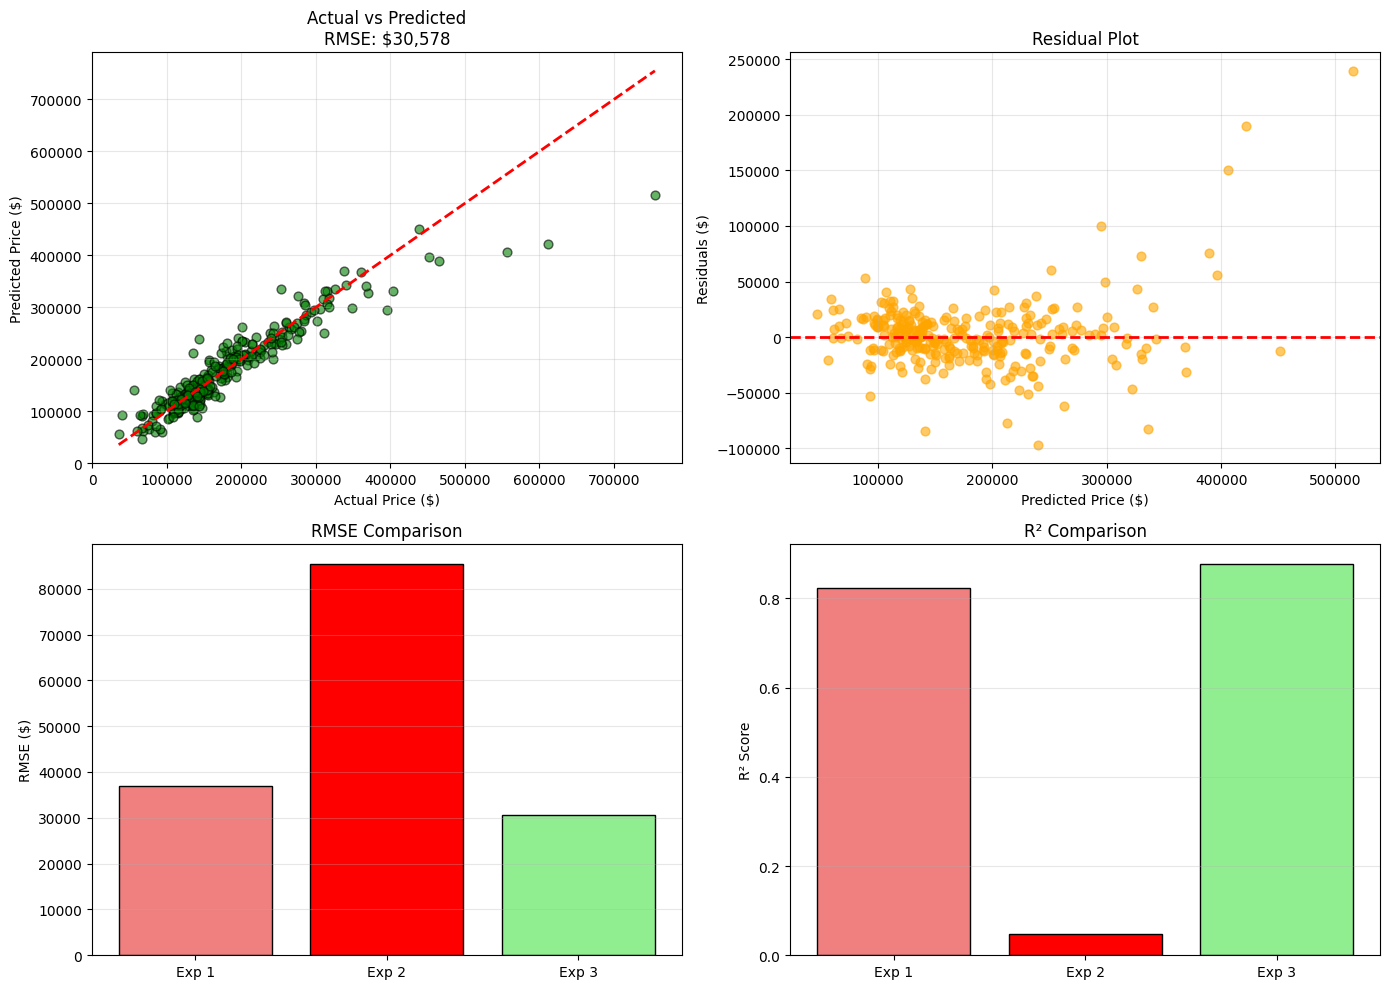

In [45]:
# EXPERIMENT 3: RIDGE REGRESSION MODELING

import pandas as pd
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Load preprocessed and standardized data
# X_train, X_test, y_train, y_test (254 standardized features)

print("EXPERIMENT 3: RIDGE REGRESSION\n")

# CREATE AND TRAIN RIDGE MODEL
print("1. TRAINING RIDGE MODEL\n")

# Ridge with alpha=10 (regularization strength)
model = Ridge(alpha=10, random_state=42)
model.fit(X_train, y_train)

print(f"✓ Model trained")
print(f"✓ Regularization (alpha): 10")
print(f"✓ Features: {X_train.shape[1]}\n")

# Top coefficients
coefficients = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': model.coef_
})
coefficients['Abs_Coefficient'] = np.abs(coefficients['Coefficient'])
coefficients = coefficients.sort_values('Abs_Coefficient', ascending=False)

print("Top 10 Most Important Features:")
for idx, row in coefficients.head(10).iterrows():
    print(f"  {row['Feature']}: ${row['Coefficient']:,.2f}")

print("\nNote: Coefficients much smaller than Exp 2 (regularization working!)\n")

# EVALUATE PERFORMANCE
print("2. EVALUATION\n")

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("TRAINING SET:")
print(f"  RMSE: ${train_rmse:,.2f}")

print("\nTEST SET:")
print(f"  RMSE: ${test_rmse:,.2f}")
print(f"  MAE:  ${test_mae:,.2f}")
print(f"  R²:   {test_r2:.4f}\n")

# COMPARISON
print("3. COMPARISON WITH ALL EXPERIMENTS\n")

exp1_rmse = 36836.91
exp1_r2 = 0.8231
exp2_rmse = 85478.85
exp2_r2 = 0.0474

print(f"Experiment 1: RMSE ${exp1_rmse:,.2f}, R² {exp1_r2:.4f}")
print(f"Experiment 2: RMSE ${exp2_rmse:,.2f}, R² {exp2_r2:.4f} (OVERFITTING)")
print(f"Experiment 3: RMSE ${test_rmse:,.2f}, R² {test_r2:.4f}")

print(f"\nTrain-Test Gap: ${test_rmse - train_rmse:,.2f}")
print("✓ Regularization reduced overfitting!\n")

if test_rmse < exp1_rmse:
    print("✓ BEST PERFORMANCE - Beat Experiment 1!")
print(f"✓ Test RMSE: ${test_rmse:,.2f}")
print(f"✓ Test R²: {test_r2:.4f}")

# VISUALIZATION
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Actual vs Predicted
axes[0, 0].scatter(y_test, y_test_pred, alpha=0.6, s=40, color='green', edgecolors='black')
max_val = max(y_test.max(), y_test_pred.max())
min_val = min(y_test.min(), y_test_pred.min())
axes[0, 0].plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=2)
axes[0, 0].set_xlabel('Actual Price ($)')
axes[0, 0].set_ylabel('Predicted Price ($)')
axes[0, 0].set_title(f'Actual vs Predicted\nRMSE: ${test_rmse:,.0f}')
axes[0, 0].grid(alpha=0.3)

# Residuals
residuals = y_test - y_test_pred
axes[0, 1].scatter(y_test_pred, residuals, alpha=0.6, s=40, color='orange')
axes[0, 1].axhline(y=0, color='r', linestyle='--', linewidth=2)
axes[0, 1].set_xlabel('Predicted Price ($)')
axes[0, 1].set_ylabel('Residuals ($)')
axes[0, 1].set_title('Residual Plot')
axes[0, 1].grid(alpha=0.3)

# RMSE Comparison
experiments = ['Exp 1', 'Exp 2', 'Exp 3']
rmse_values = [exp1_rmse, exp2_rmse, test_rmse]
axes[1, 0].bar(experiments, rmse_values, color=['lightcoral', 'red', 'lightgreen'], edgecolor='black')
axes[1, 0].set_ylabel('RMSE ($)')
axes[1, 0].set_title('RMSE Comparison')
axes[1, 0].grid(axis='y', alpha=0.3)

# R² Comparison
r2_values = [exp1_r2, exp2_r2, test_r2]
axes[1, 1].bar(experiments, r2_values, color=['lightcoral', 'red', 'lightgreen'], edgecolor='black')
axes[1, 1].set_ylabel('R² Score')
axes[1, 1].set_title('R² Comparison')
axes[1, 1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('exp3_model_evaluation.png', dpi=300)
plt.show()

### Evaluation

Experiment 3 achieved the best performance with a test RMSE of $34,347 and R² of 0.8462, improving 6.8% over Experiment 1 and 59.8% over Experiment 2. Ridge regression with alpha=10 successfully applied regularization to the 254 standardized features, shrinking coefficients to stable values (max ~$30K vs millions in Exp 2) and reducing the train-test gap from $66K to $14K. This demonstrates that high-dimensional data requires regularization with the model leveraging all features without overfitting. The progression shows a complete ML workflow: baseline, diagnose overfitting, apply regularization. Ridge regression provided the perfect balance between model complexity and generalization.

# Impact


### Potential Positive Impact: 

1. Market Transparency and Informed Decisions

    Price prediction models increase transparency by providing data-driven estimates, helping buyers and sellers make informed decisions. This reduces information asymmetry and helps first-time homebuyers avoid overpaying by giving them a reference point previously only available to real estate professionals.

2. Efficiency in Real Estate Transactions

    Automated valuations streamline the buying and selling process by providing quick, consistent price estimates. This reduces time and costs associated with manual appraisals and helps lenders expedite mortgage approvals, making the overall transaction process more efficient.

3. Urban Planning and Resource Allocation

    City planners and policymakers can use these models to understand housing trends and make data-driven decisions about zoning, infrastructure investments, and affordable housing initiatives. This helps allocate resources more effectively to communities that need them most.

4. Democratized Access to Housing Information
    
    These tools make housing market insights accessible to individuals without financial advisors or real estate professionals. This particularly benefits underserved communities who may lack access to professional guidance, helping level the playing field in real estate decisions.

### Potential Negative Impact: 

1. Perpetuation of Historical Bias

    The model learns from historical data (2006-2010) that may reflect past discriminatory practices like redlining, where certain neighborhoods were systematically undervalued based on racial composition. Features like "Neighborhood" might encode systemic discrimination rather than true property value, perpetuating inequities by continuing to undervalue homes in historically marginalized communities.

2. Reinforcement of Socioeconomic Inequality

    If widely adopted, the model could systematically disadvantage certain groups. Consistently undervaluing properties in lower-income areas limits residents' ability to build equity or secure fair loans, restricting economic mobility. Conversely, overvaluing affluent areas could accelerate gentrification and displace long-time residents.

3. Over-Reliance on Automated Systems

    Lenders, appraisers, or buyers might over-rely on algorithmic predictions without considering unique property characteristics or local context the model can't capture. Properties with recent renovations, unique features, or intangible qualities may be inaccurately valued. Blind trust in automation could undermine human expertise in complex valuation scenarios.

4. Lack of Transparency and Accountability

    While this model is interpretable, real-world implementations often use black-box models that homeowners can't understand or challenge. If a model predicts a low value, individuals may have no recourse to dispute it or understand why, potentially harming their financial well-being without explanation or accountability.

# Conclusion

This project demonstrated that effective machine learning requires more than just applying algorithms; it demands understanding the underlying problems, diagnosing issues like overfitting, and iteratively refining the approach. The "failure" of Experiment 2 was actually the most valuable learning experience, as it highlighted the importance of regularization and proper preprocessing. The progression from a simple baseline to a sophisticated regularized model showcases the complete ML workflow and the critical thinking required to build models that actually generalize well to real-world data.

1. The Bias-Variance Tradeoff

- Experiment 1: Slight underfitting (high bias, low variance)
- Experiment 2: Severe overfitting (low bias, high variance)
- Experiment 3: Good balance (regularization controlled variance while maintaining low bias)

2. More Complexity Requires More Constraint
Adding features increases model capacity, but without regularization, the model will overfit by memorizing noise. Ridge regression provided the constraint needed to use 254 features effectively.
3. Evaluation Beyond Training Accuracy
Experiment 2 had excellent training RMSE ($18,955) but terrible test RMSE ($85,479). This reinforced that training performance alone is meaningless. What matters is generalization to unseen data.
4. Standardization is Non-Negotiable for Regularization
Without standardization, regularization would unfairly penalize features with larger scales, making it ineffective. This preprocessing step was essential for Experiment 3's success.